### Preprocessing

In [37]:
import os
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
%matplotlib inline
%config InlineBackend.figure_format='svg'

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Set working directory
working_directory = 'C:/Users/hongz/Downloads/Predoc/JDs/Material'
os.chdir(working_directory)

# Get English stop words from NLTK
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters, keeping spaces
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hongz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
import PyPDF2

job_descriptions = []

# Read text files
for file_name in os.listdir():
    if file_name.endswith('.txt'):
        with open(file_name, 'r', encoding='utf-8') as file:
            job_descriptions.append(file.read())

# Read PDF files
for file_name in os.listdir():
    if file_name.endswith('.pdf'):
        with open(file_name, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                job_descriptions.append(page.extract_text())

# Preprocess all job descriptions
preprocessed_descriptions = [preprocess_text(description) for description in job_descriptions]

# Combine all descriptions into a single string
all_descriptions = ' '.join(preprocessed_descriptions)

### Check Perplexity

In [25]:
# Create a Document-Term Matrix
# Create Document-Term Matrix with bi-grams
vectorizer = CountVectorizer(ngram_range=(1, 2))  # This includes both unigrams and bigrams
dtm = vectorizer.fit_transform(preprocessed_descriptions)
dtm

<54x14678 sparse matrix of type '<class 'numpy.int64'>'
	with 33838 stored elements in Compressed Sparse Row format>

In [26]:
def compute_perplexity(dtm, max_topics):
    perplexities = []
    for n_topics in range(1, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(dtm)
        perplexity = lda.perplexity(dtm)
        perplexities.append(perplexity)
        print(f'Number of topics: {n_topics}, Perplexity: {perplexity}')
    return perplexities

max_topics = 20  # You can adjust this
perplexity_scores = compute_perplexity(dtm, max_topics)

Number of topics: 1, Perplexity: 8729.229463881056
Number of topics: 2, Perplexity: 8090.570618267465
Number of topics: 3, Perplexity: 7914.305257941965
Number of topics: 4, Perplexity: 7606.612814367884
Number of topics: 5, Perplexity: 7642.906734228409
Number of topics: 6, Perplexity: 7716.567707162022
Number of topics: 7, Perplexity: 7575.035898473487
Number of topics: 8, Perplexity: 7656.884126430361
Number of topics: 9, Perplexity: 7821.540759135608
Number of topics: 10, Perplexity: 7568.138128248389
Number of topics: 11, Perplexity: 7510.793586025735
Number of topics: 12, Perplexity: 7377.821004037515
Number of topics: 13, Perplexity: 7399.596413122802
Number of topics: 14, Perplexity: 7669.199576522072
Number of topics: 15, Perplexity: 7390.854231982896
Number of topics: 16, Perplexity: 7712.235779143503
Number of topics: 17, Perplexity: 7426.288431275879
Number of topics: 18, Perplexity: 7490.836646157429
Number of topics: 19, Perplexity: 7428.186040099544
Number of topics: 20,

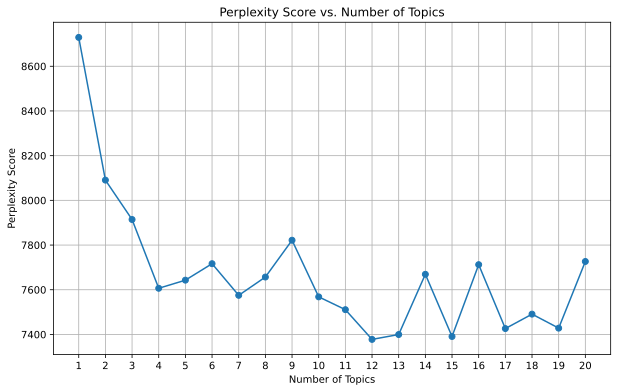

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_topics + 1), perplexity_scores, marker='o')
plt.title('Perplexity Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.xticks(range(1, max_topics + 1))  # Set x-ticks to show each topic number
plt.grid()
plt.show()

### Word Cloud

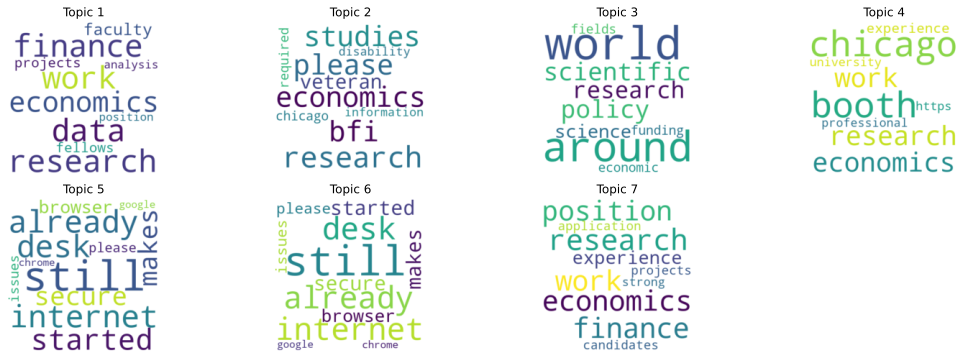

In [29]:
# Fit LDA model with 4 topics
n_topics = 7
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

# Extract the top words for each topic
def get_top_words(lda_model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names_out()
    topic_words = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        topic_words[topic_idx] = [words[i] for i in top_words_idx]
    return topic_words

top_words_per_topic = get_top_words(lda, vectorizer, 10)  # Get top 10 words for each topic

# Generate word clouds for each topic
plt.figure(figsize=(15, 10))
for i in range(n_topics):
    plt.subplot(4, 4, i + 1)
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(' '.join(top_words_per_topic[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i + 1}')
plt.tight_layout()
plt.show()

In [42]:
job_descriptions

["Research Professional – Christopher Blattman (Full-Time, Benefits Eligible)\nat Becker Friedman Institute for Economics at the University of Chicago (BFI) (View all jobs)\nChicago, IL\nJob Title: Research Professional – Christopher Blattman (Full-Time, Benefits Eligible)\n\nLocation: Chicago, IL – Hyde Park Campus, Saieh Hall \n\nExpected Start Date: April 2023 to July 2023\n\nPlease direct questions to bfipredoc@uchicago.edu. \n\nJob Summary\n\nThe Becker Friedman Institute for Economics (BFI) is seeking to hire a full-time Research Professional to work for Professor Christopher Blattman as part of BFI’s Development Economics Initiative. The Research Professional will collaborate on new and ongoing research projects with a focus on, but not limited to, the empirical analysis of field and quasi-experiments. More specifically, the Research Professional will be involved in advanced empirical and theoretical work on violence prevention, on the economics organized crime, as well as other

### Change to Qualification Requirement

In [49]:
def extract_requirements(text):
    # Normalize the text to lowercase (if necessary)
    # text = text.lower()  # Uncomment if case normalization is required

    # Patterns to capture different qualification structures
    patterns = [
        r'(?:degree|education|qualification|experience|skills|background)[^a-zA-Z]*(?:(?:[Bb]achelor|[Mm]aster|[Pp]h\.?D)[^a-zA-Z]*\w+[^a-zA-Z]*|\b(?:Stata|Python|R|MATLAB|SQL|SAS|Julia|Django|Fortran|C|Jinja2|Django/Jinja2)\b|(?:quantitative|programming|analytical|econometrics?|statistical|research|analysis|modeling|data\sanalysis)\b)[^a-zA-Z,;]*[\.,]?',  # General qualification phrases
        r'(\d+\.\s*.*?)(?=\n|•|$)',  # Numbered lists (e.g., 1. Bachelor's degree)
        r'•\s*(.*?)(?=\n|$)',  # Bullet points
        r'\((i+|ii+|iii+|iv+|v+)\)\s*(.*?)(?=\n|$)',  # Parenthetical qualifications with Roman numerals
    ]
    
    # Initialize a set to collect unique qualifications
    requirements = set()

    # Extract using each pattern
    for pattern in patterns:
        matches = re.findall(pattern, text)
        for match in matches:
            # If the match is a tuple (for patterns with groups)
            if isinstance(match, tuple):
                clean_match = re.sub(r'\s+', ' ', match[-1]).strip()  # Last element is the relevant text
            else:
                clean_match = re.sub(r'\s+', ' ', match).strip()  # Clean up extra spaces for single matches
            
            # Filter out irrelevant fragments like dates, URLs, or other non-relevant data
            if clean_match and not re.match(r'^\(?[i]{1,3}\)?$', clean_match):  # Ignore lone Roman numerals
                # Further clean matches (e.g., remove dates, URLs, etc.)
                if not re.search(r'\d{4}|\bhttps?://\S+', clean_match):  # Exclude dates and URLs
                    requirements.add(clean_match)

    # Further clean qualifications by removing unwanted fragments
    cleaned_requirements = set()  # Directly use a set to avoid duplicates
    for req in requirements:
        req = req.replace('\n', ' ').strip()  # Replace newlines with space
        # Ignore common non-qualification phrases like "CV", "Cover letter", "submit", "salary", etc.
        if req and not any(x in req.lower() for x in ['cv', 'cover letter', 'apply', 'submit', 'references', 'salary', 'benefits', 'location']):
            # Additionally, filter out entries that look more like procedural steps (e.g., "1. A transcript")
            if not re.match(r'^\d+\.', req):
                cleaned_requirements.add(req)

    return list(cleaned_requirements)  # Return unique requirements as a list

# Combine all job descriptions into one string for processing
combined_descriptions = "\n".join(job_descriptions)

# Extract requirements from the combined job descriptions string
requirements = extract_requirements(combined_descriptions)

# Print the extracted requirements
print("Extracted Requirements:")
for req in requirements:
    print(f"- {req}")


Extracted Requirements:
- Strong computer skills including programming
- Background in economic research is a plus, but not necessary – we welcome
- Work on the transition for both projects with current pre-doc Jackson Howell.
- the ability to work independently to solve problems, and (iv) a long-
- Exceptional programming skills and experience, especially in Stata, R, MATLAB, or Python;
- experience with Stata or another statistical package such as SAS, R, or SPSS. Background in
- mapping how global firms finance themselves through
- Unofficial transcripts.
- Familiarity with statistical tools such as linear regression is required.
- have a strong long-term interest in pursuing a PhD in
- a minimum of one year of relevant research experience (experience gained in school counts),
- a strong quantitative background, (ii) strong computer skills including
- a Bachelor's degree or higher in a field relevant to the research
- have statistical/scientiﬁc programming experience, especially in 

In [54]:
vectorizer = CountVectorizer()  # This includes both unigrams and bigrams
dtm = vectorizer.fit_transform(requirements)
dtm

<57x319 sparse matrix of type '<class 'numpy.int64'>'
	with 683 stored elements in Compressed Sparse Row format>

In [55]:
def compute_perplexity(dtm, max_topics):
    perplexities = []
    for n_topics in range(1, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(dtm)
        perplexity = lda.perplexity(dtm)
        perplexities.append(perplexity)
        print(f'Number of topics: {n_topics}, Perplexity: {perplexity}')
    return perplexities

max_topics = 20  # You can adjust this
perplexity_scores = compute_perplexity(dtm, max_topics)

Number of topics: 1, Perplexity: 248.7884193600504
Number of topics: 2, Perplexity: 260.32400139845697
Number of topics: 3, Perplexity: 291.03740586064794
Number of topics: 4, Perplexity: 317.94163797761416
Number of topics: 5, Perplexity: 305.128267012977
Number of topics: 6, Perplexity: 341.4131033181575
Number of topics: 7, Perplexity: 344.0698998769259
Number of topics: 8, Perplexity: 347.8212660892566
Number of topics: 9, Perplexity: 362.9237357643677
Number of topics: 10, Perplexity: 366.3668949723814
Number of topics: 11, Perplexity: 400.5363557341713
Number of topics: 12, Perplexity: 411.37492283107724
Number of topics: 13, Perplexity: 402.8618437630784
Number of topics: 14, Perplexity: 417.76092001895273
Number of topics: 15, Perplexity: 388.9908433195972
Number of topics: 16, Perplexity: 411.81503039785474
Number of topics: 17, Perplexity: 413.8286026009628
Number of topics: 18, Perplexity: 415.74949628393915
Number of topics: 19, Perplexity: 437.4468473227183
Number of topic

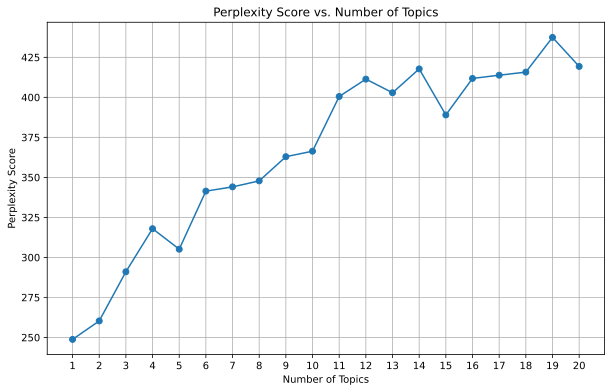

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_topics + 1), perplexity_scores, marker='o')
plt.title('Perplexity Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.xticks(range(1, max_topics + 1))  # Set x-ticks to show each topic number
plt.grid()
plt.show()

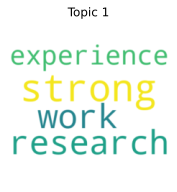

In [58]:
# Fit LDA model with 4 topics
n_topics = 1
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

# Extract the top words for each topic
def get_top_words(lda_model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names_out()
    topic_words = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        topic_words[topic_idx] = [words[i] for i in top_words_idx]
    return topic_words

top_words_per_topic = get_top_words(lda, vectorizer, 10)  # Get top 10 words for each topic

# Generate word clouds for each topic
plt.figure(figsize=(15, 10))
for i in range(n_topics):
    plt.subplot(4, 4, i + 1)
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(' '.join(top_words_per_topic[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i + 1}')
plt.tight_layout()
plt.show()

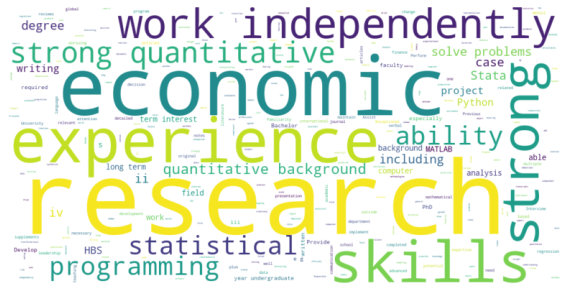

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'requirements' is a list of strings
requirements_text = " ".join(requirements)  # Join the list of strings into one string

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, max_words=1628, relative_scaling=1, background_color='white').generate(requirements_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the word cloud to a file (optional)
# output_path = 'C:/Users/hongz/Downloads/haha.pdf'
# plt.savefig(output_path, bbox_inches='tight')

# Show the word cloud image
plt.show()